In [189]:
import warnings
warnings.filterwarnings('ignore')

In [190]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Imbalanced dataset
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_auc_score,roc_curve 
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [191]:
pd.options.display.max_columns = None

In [192]:
bank_df = pd.read_csv('bank-full.csv')

In [193]:
bank_df.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [194]:
bank_df.tail(5)

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no

In [195]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [196]:
bank_df.shape

(45211, 17)

In [197]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

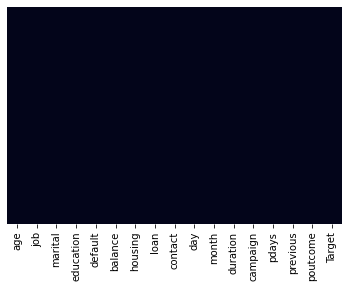

In [198]:
sns.heatmap(bank_df.isnull(),yticklabels=False,cbar=False)

In [199]:
bank_df.describe(include = 'all').T

count unique          top   freq      mean      std   min  25%  \
age        45211    NaN          NaN    NaN   40.9362  10.6188    18   33   
job        45211     12  blue-collar   9732       NaN      NaN   NaN  NaN   
marital    45211      3      married  27214       NaN      NaN   NaN  NaN   
education  45211      4    secondary  23202       NaN      NaN   NaN  NaN   
default    45211      2           no  44396       NaN      NaN   NaN  NaN   
balance    45211    NaN          NaN    NaN   1362.27  3044.77 -8019   72   
housing    45211      2          yes  25130       NaN      NaN   NaN  NaN   
loan       45211      2           no  37967       NaN      NaN   NaN  NaN   
contact    45211      3     cellular  29285       NaN      NaN   NaN  NaN   
day        45211    NaN          NaN    NaN   15.8064  8.32248     1    8   
month      45211     12          may  13766       NaN      NaN   NaN  NaN   
duration   45211    NaN          NaN    NaN   258.163  257.528     0  103   
campaign   45211    NaN          NaN    NaN   2.76384  3.09802     1    1   
pdays      45211    NaN          NaN    NaN   40.1978  100.129    -1   -1   
previous   45211    NaN          NaN    NaN  0.580323  2.30344     0    0   
poutcome   45211      4      unknown  36959       NaN      NaN   NaN  NaN   
Target     45211      2           no  39922       NaN      NaN   NaN  NaN   

           50%   75%     max  
age         39    48      95  
job        NaN   NaN     NaN  
marital    NaN   NaN     NaN  
education  NaN   NaN     NaN  
default    NaN   NaN     NaN  
balance    448  1428  102127  
housing    NaN   NaN     NaN  
loan       NaN   NaN     NaN  
contact    NaN   NaN     NaN  
day         16    21      31  
month      NaN   NaN     NaN  
duration   180   319    4918  
campaign     2     3      63  
pdays       -1    -1     871  
previous     0     0     275  
poutcome   NaN   NaN     NaN  
Target     NaN   NaN     NaN

In [200]:
# Convert Target from Yes / No to 1/0
bank_df["Target"] = bank_df["Target"].astype('category')
bank_df["Target"] = bank_df["Target"].cat.codes

In [201]:
# Check for Skew
bank_df.skew().sort_values(ascending=False)

previous    41.846454
balance      8.360308
campaign     4.898650
duration     3.144318
pdays        2.615715
Target       2.383480
age          0.684818
day          0.093079
dtype: float64

In [202]:
# Check for Outliers
bank_df.kurt().sort_values(ascending=False)

previous    4506.860660
balance      140.751547
campaign      39.249651
duration      18.153915
pdays          6.935195
Target         3.681142
age            0.319570
day           -1.059897
dtype: float64

In [203]:
bank_df.columns

# Categorical
#'job', 'marital', 'education', 'default', 'housing','loan', 'contact',  'month', 'poutcome', 'Target'
# 'day', 'campaign', 'pdays','previous'
#Numerical
#'age', 'balance', 'duration'

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

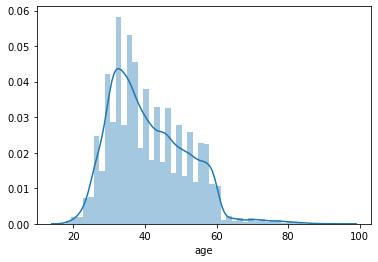

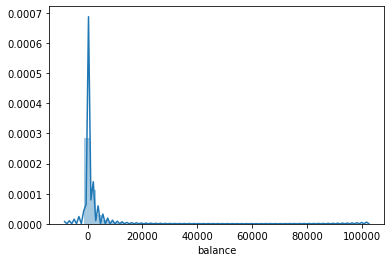

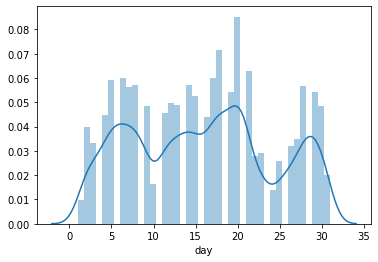

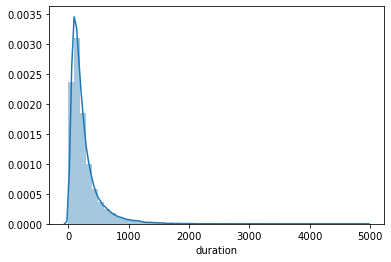

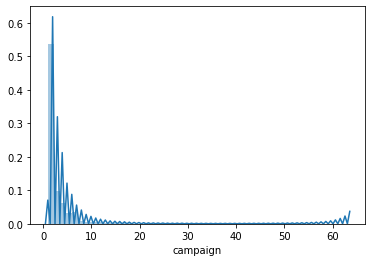

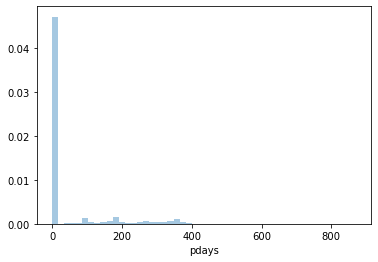

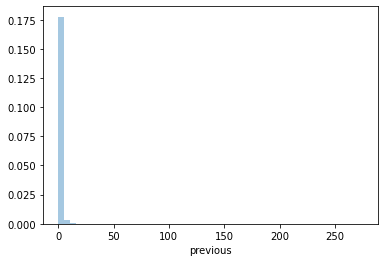

In [204]:
# Distribution Plots for Continous Variables
for i,col in enumerate(['age', 'balance','day', 'duration', 'campaign', 'pdays','previous']):
    sns.distplot(bank_df[col])
    plt.show()

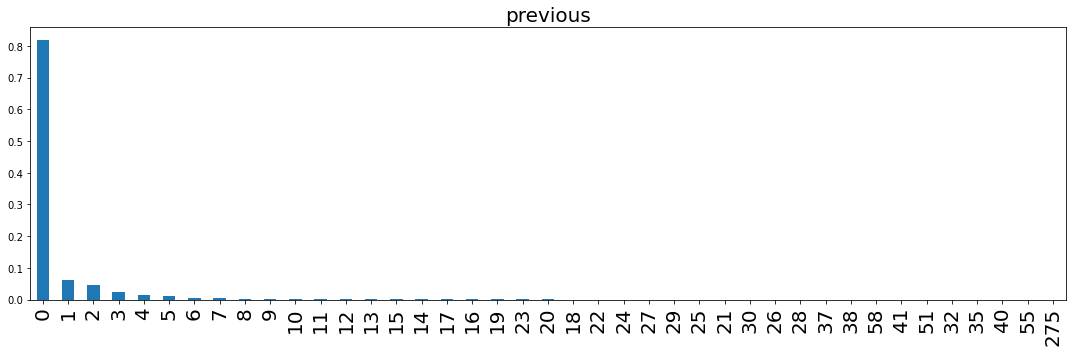

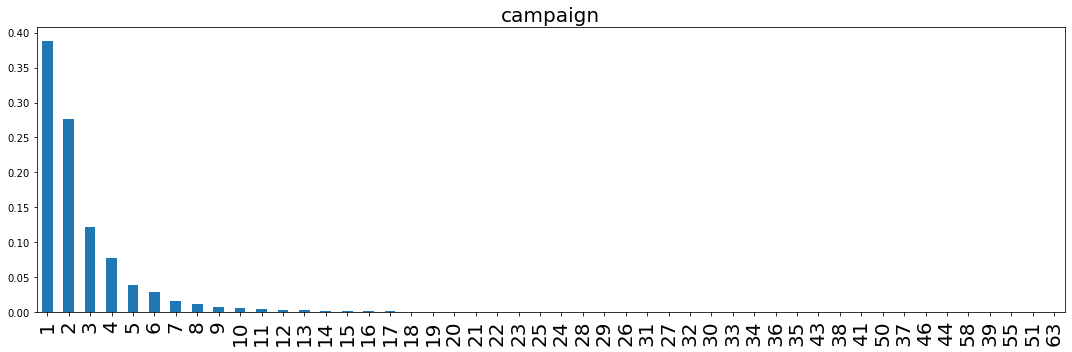

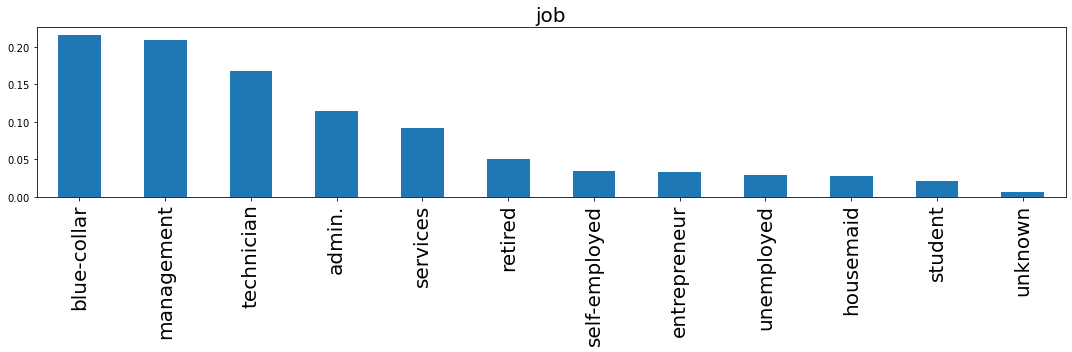

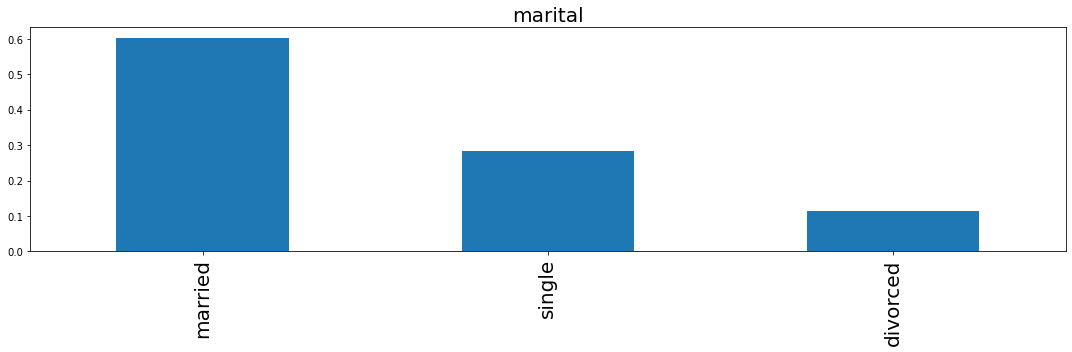

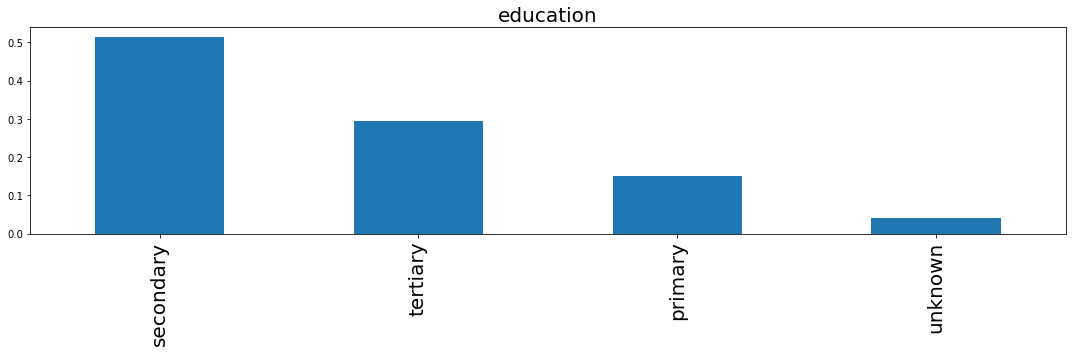

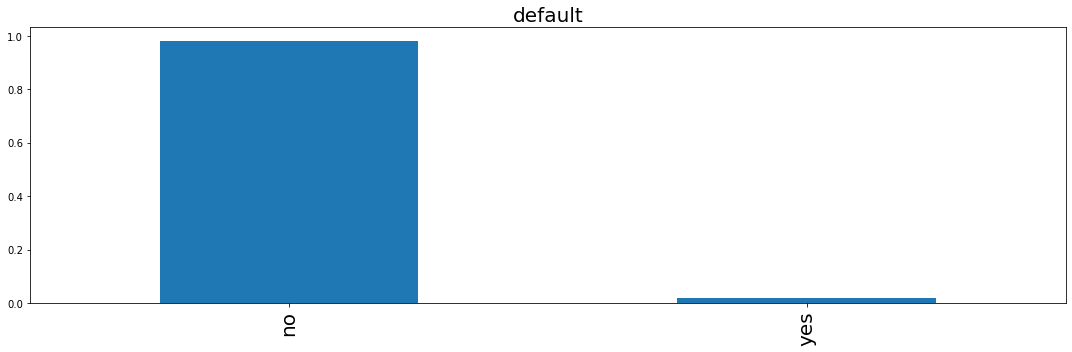

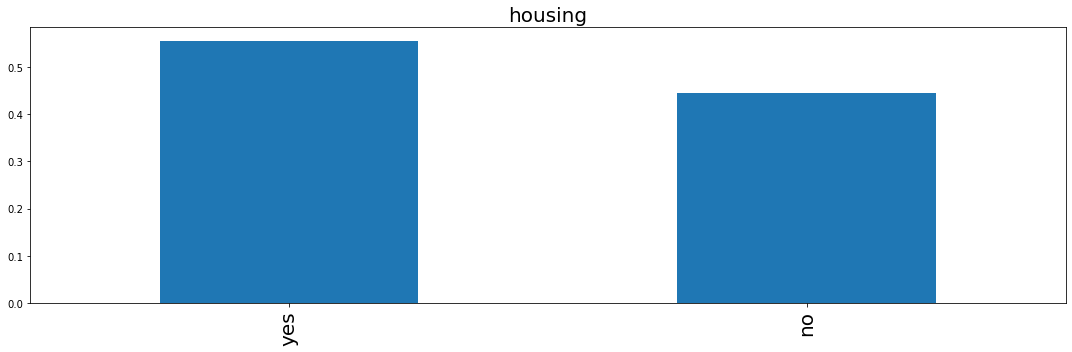

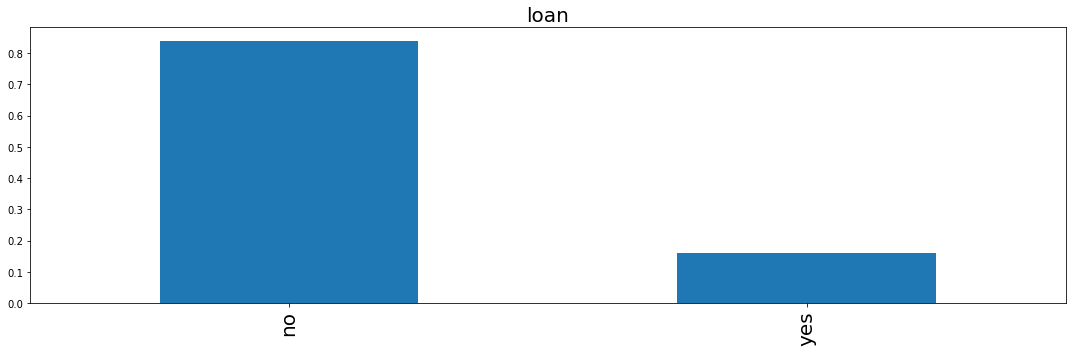

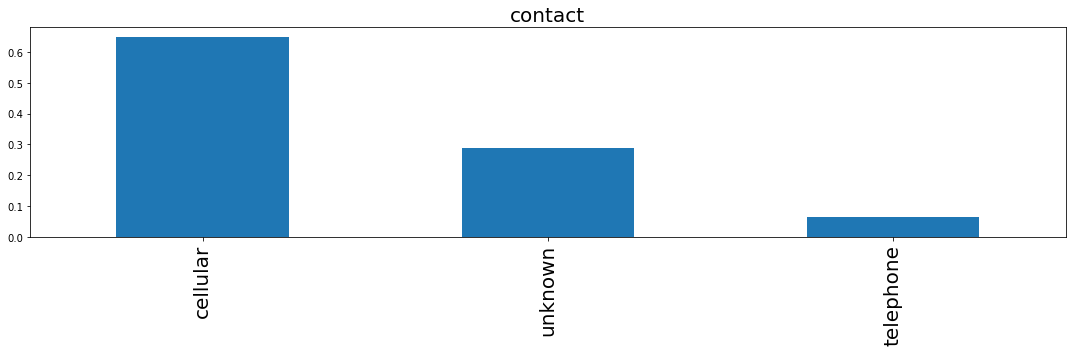

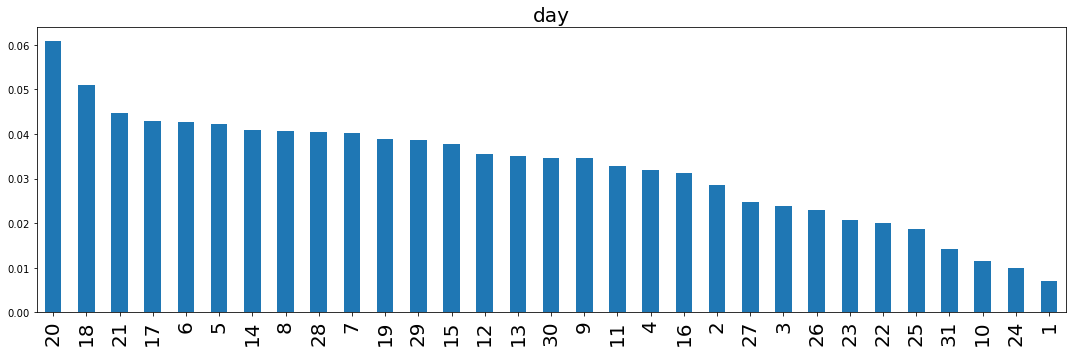

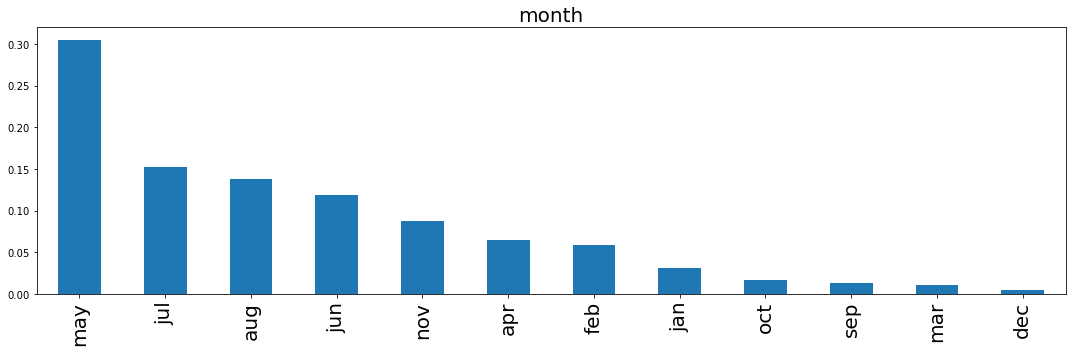

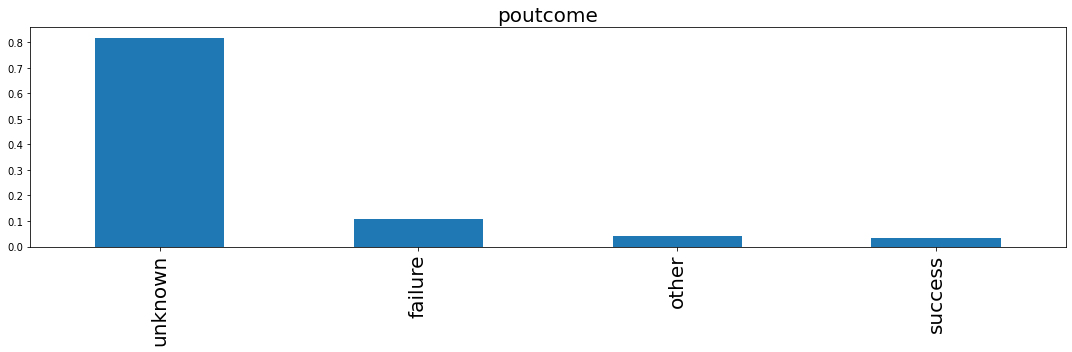

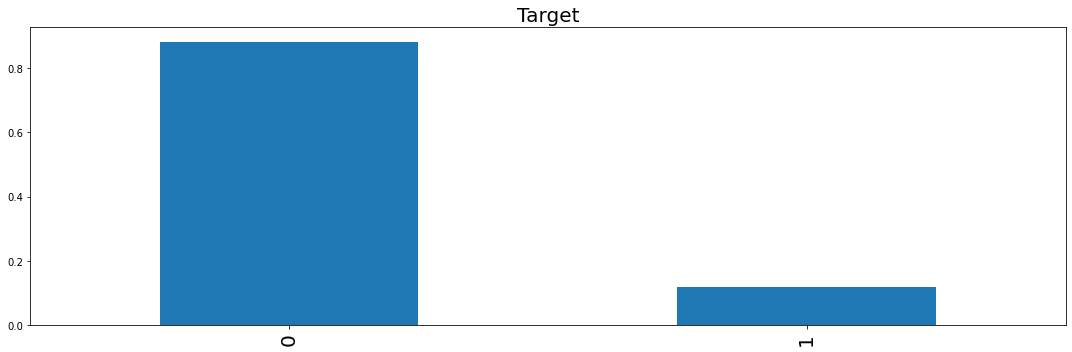

In [18]:
# Plot value counts for all categorical features
for feature in ['previous','campaign','job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'day', 'month', 'poutcome', 'Target']:
    bank_df[feature].value_counts(normalize=True).sort_values(ascending=False).plot.bar(figsize=(15,5))
    plt.xticks(fontsize=20);
    plt.title(feature,fontsize=20)
    plt.tight_layout()
    plt.show()
    
# Call outs - previous, pday, campaign could be binned based on distribution,  default could be dropped as it's highly imbalanced 

In [267]:
# Drop duration based on business call out as this column isnt available in Production and also leads to Data Leakage
bank_df.drop(['duration'],inplace=True,axis=1)

previous


Target           0         1
previous                    
0         0.908427  0.091573
1         0.789683  0.210317
2         0.783476  0.216524
3         0.742557  0.257443
4         0.760504  0.239496
5         0.736383  0.263617
6         0.700361  0.299639
7         0.736585  0.263415
8         0.697674  0.302326
9         0.739130  0.260870
10        0.611940  0.388060
11        0.769231  0.230769
12        0.772727  0.227273
13        0.763158  0.236842
14        0.736842  0.263158
15        0.950000  0.050000
16        1.000000  0.000000
17        0.800000  0.200000
18        1.000000  0.000000
19        0.818182  0.181818
20        0.875000  0.125000
21        0.750000  0.250000
22        0.833333  0.166667
23        0.875000  0.125000
24        1.000000  0.000000
25        1.000000  0.000000
26        0.500000  0.500000
27        1.000000  0.000000
28        1.000000  0.000000
29        0.750000  0.250000
30        0.666667  0.333333
32        1.000000  0.000000
35 

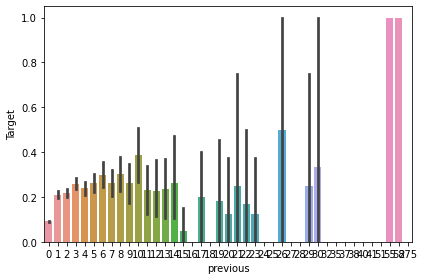

campaign


Target           0         1
campaign                    
1         0.854024  0.145976
2         0.887965  0.112035
3         0.888064  0.111936
4         0.909994  0.090006
5         0.921202  0.078798
6         0.928737  0.071263
7         0.936054  0.063946
8         0.940741  0.059259
9         0.935780  0.064220
10        0.947368  0.052632
11        0.920398  0.079602
12        0.974194  0.025806
13        0.954887  0.045113
14        0.956989  0.043011
15        0.952381  0.047619
16        0.974684  0.025316
17        0.913043  0.086957
18        1.000000  0.000000
19        1.000000  0.000000
20        0.976744  0.023256
21        0.971429  0.028571
22        1.000000  0.000000
23        1.000000  0.000000
24        0.950000  0.050000
25        1.000000  0.000000
26        1.000000  0.000000
27        1.000000  0.000000
28        1.000000  0.000000
29        0.937500  0.062500
30        1.000000  0.000000
31        1.000000  0.000000
32        0.888889  0.111111
33 

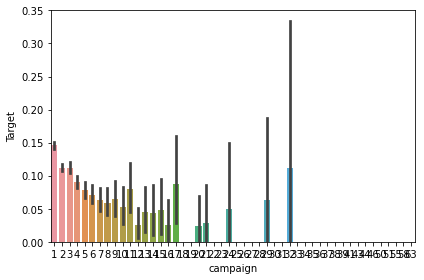

job


Target                0         1
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056




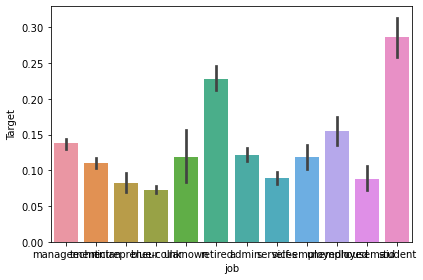

marital


Target           0         1
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492




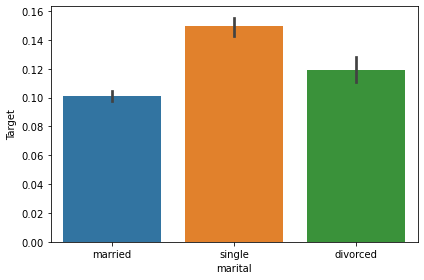

education


Target            0         1
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064
unknown    0.864297  0.135703




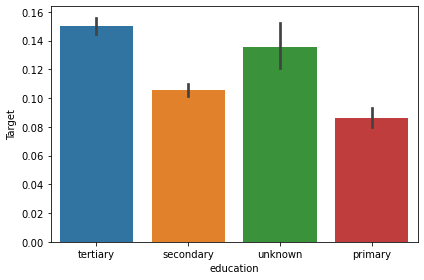

default


Target          0         1
default                    
no       0.882039  0.117961
yes      0.936196  0.063804




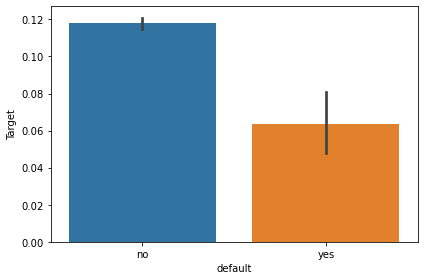

housing


Target          0         1
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000




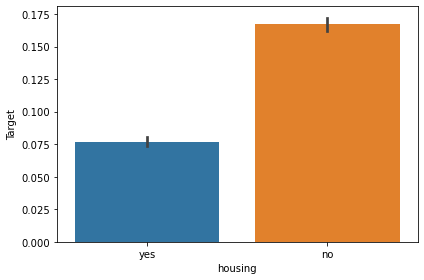

loan


Target         0         1
loan                      
no      0.873443  0.126557
yes     0.933186  0.066814




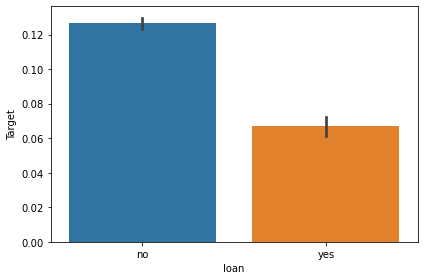

contact


Target            0         1
contact                      
cellular   0.850811  0.149189
telephone  0.865795  0.134205
unknown    0.959293  0.040707




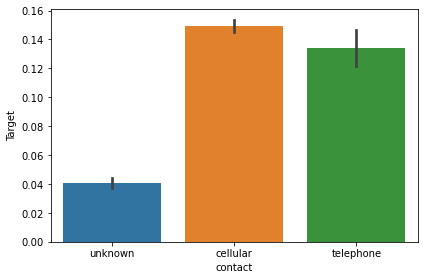

day


Target         0         1
day                       
1       0.720497  0.279503
2       0.859242  0.140758
3       0.835032  0.164968
4       0.840830  0.159170
5       0.887435  0.112565
6       0.906315  0.093685
7       0.913594  0.086406
8       0.890879  0.109121
9       0.885330  0.114670
10      0.769084  0.230916
11      0.877620  0.122380
12      0.847785  0.152215
13      0.847950  0.152050
14      0.886364  0.113636
15      0.860247  0.139753
16      0.864311  0.135689
17      0.909232  0.090768
18      0.901213  0.098787
19      0.930563  0.069437
20      0.930233  0.069767
21      0.900790  0.099210
22      0.829834  0.170166
23      0.865815  0.134185
24      0.861298  0.138702
25      0.841667  0.158333
26      0.887923  0.112077
27      0.866191  0.133809
28      0.921858  0.078142
29      0.926074  0.073926
30      0.826948  0.173052
31      0.928460  0.071540




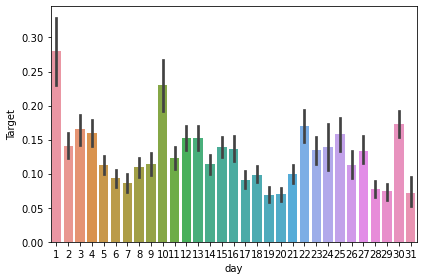

month


Target         0         1
month                     
apr     0.803206  0.196794
aug     0.889867  0.110133
dec     0.532710  0.467290
feb     0.833522  0.166478
jan     0.898788  0.101212
jul     0.909065  0.090935
jun     0.897772  0.102228
mar     0.480084  0.519916
may     0.932805  0.067195
nov     0.898489  0.101511
oct     0.562331  0.437669
sep     0.535406  0.464594




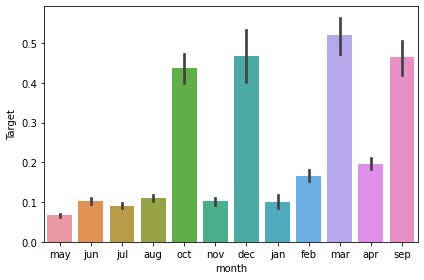

poutcome


Target           0         1
poutcome                    
failure   0.873903  0.126097
other     0.833152  0.166848
success   0.352747  0.647253
unknown   0.908385  0.091615




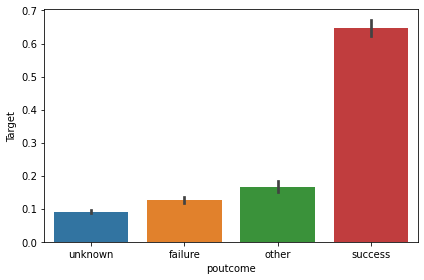

In [20]:
# Test different categorical variable relationship with Personal Loan variable
for i in ['previous','campaign','job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'day', 'month', 'poutcome']:
    print(i)
    print('\n')
    print(pd.crosstab(bank_df[i],bank_df['Target'],normalize='index').sort_values(ascending=True,by=i))
    print('\n')
    sns.barplot(x=i,y='Target',data=bank_df)
    plt.tight_layout()
    plt.show()

In [21]:
df_temp = pd.crosstab(bank_df['default'],bank_df['Target']).sort_values(ascending=True,by='default')
df_temp["Total"] = df_temp[0] + df_temp[1]
df_temp
# Call out drop default as very less data available for 1 (52 rows only)

Target       0     1  Total
default                    
no       39159  5237  44396
yes        763    52    815

In [22]:
df_temp = pd.crosstab(bank_df['poutcome'],bank_df['Target']).sort_values(ascending=True,by='poutcome')
df_temp["Total"] = df_temp[0] + df_temp[1]
df_temp
# Call out drop poutcome as 80% of data unknown and dont see a strong relationship

Target        0     1  Total
poutcome                    
failure    4283   618   4901
other      1533   307   1840
success     533   978   1511
unknown   33573  3386  36959

In [257]:
bank_df.drop(["default","poutcome"],axis=1,inplace=True)

In [24]:
# Look at distribution for these variables that are highly skewed and have outliers
bank_df[["campaign","previous","pdays","balance"]].describe().T

count         mean          std     min   25%    50%     75%  \
campaign  45211.0     2.763841     3.098021     1.0   1.0    2.0     3.0   
previous  45211.0     0.580323     2.303441     0.0   0.0    0.0     0.0   
pdays     45211.0    40.197828   100.128746    -1.0  -1.0   -1.0    -1.0   
balance   45211.0  1362.272058  3044.765829 -8019.0  72.0  448.0  1428.0   

               max  
campaign      63.0  
previous     275.0  
pdays        871.0  
balance   102127.0

Text(0.5, 1.0, 'campaign')

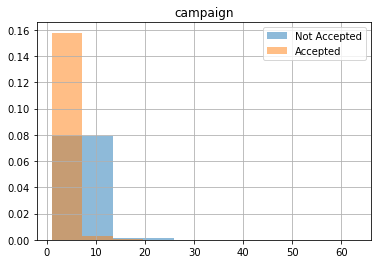

In [25]:
bank_df['campaign'][bank_df['Target'] == 0].hist(bins=5,density=True,alpha=0.5,label='Not Accepted')
bank_df['campaign'][bank_df['Target'] == 1].hist(bins=5,density=True,alpha=0.5,label='Accepted')
plt.legend()
plt.title('campaign')

Text(0.5, 1.0, 'balance')

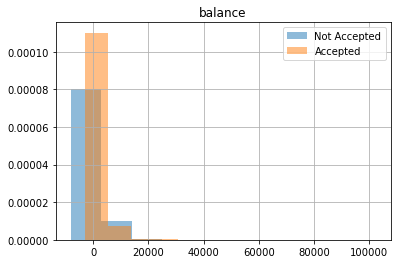

In [26]:
bank_df['balance'][bank_df['Target'] == 0].hist(bins=10,density=True,alpha=0.5,label='Not Accepted')
bank_df['balance'][bank_df['Target'] == 1].hist(bins=10,density=True,alpha=0.5,label='Accepted')
plt.legend()
plt.title('balance')

In [232]:
# Binning - 
bank_df['campaign_Bucket'] = pd.DataFrame(pd.cut(bank_df['campaign'],[0,1,3,100],labels=['1','2 to 3','>3']))
bank_df['previous_Bucket'] = pd.DataFrame(pd.cut(bank_df['previous'],[-1,0,1,276],labels=['0','1','>1']))
bank_df['pdays_Bucket'] = pd.DataFrame(pd.cut(bank_df['pdays'],[-2,-1,0,120,240,540,1000],labels=['-1','0','0-120','120-240','240-540','>540']))
bank_df['balance_Bucket'] = pd.DataFrame(pd.cut(bank_df['balance'],[-8020,72,500,1500,102128],labels=['Very Low','Low','Medium','High']))


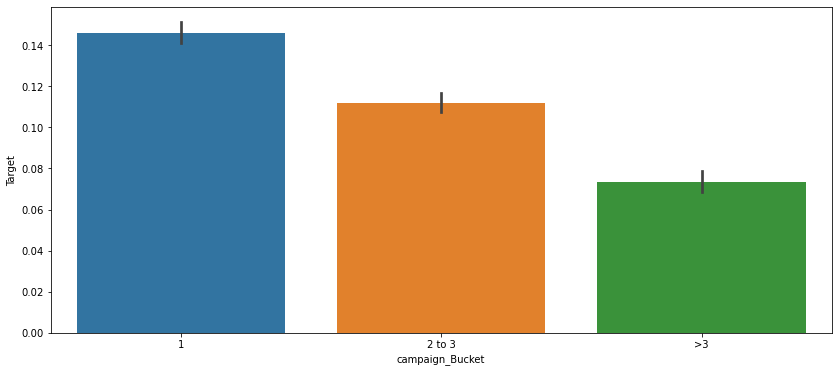

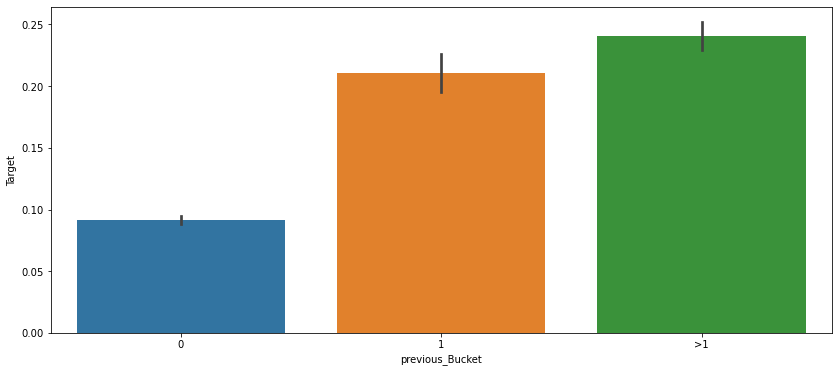

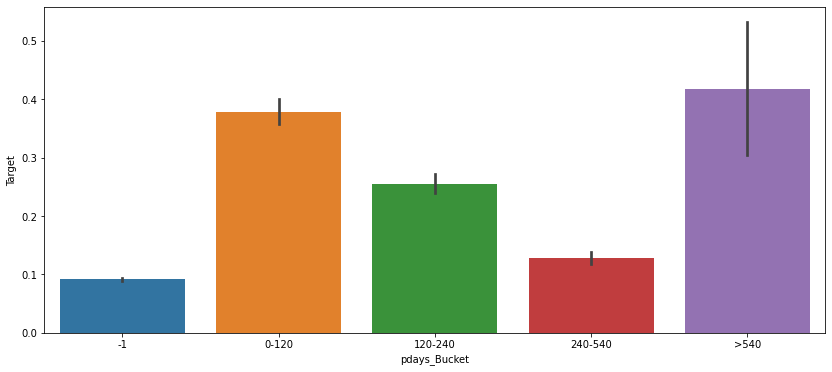

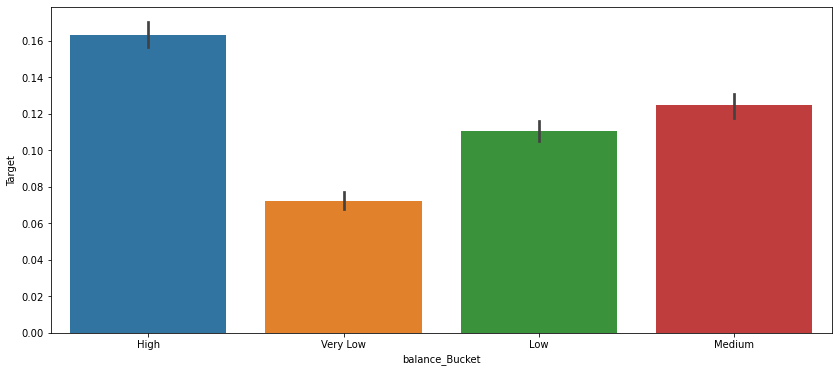

In [233]:
# Plot variation of Personal Loan across different cut variables 
plt.figure(figsize=(14,6))
sns.barplot(bank_df.sort_values(by='campaign')['campaign_Bucket'],bank_df['Target'].astype(float))
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(bank_df.sort_values(by='previous')['previous_Bucket'],bank_df['Target'].astype(float))
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(bank_df.sort_values(by='pdays')['pdays_Bucket'],bank_df['Target'].astype(float))
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(bank_df['balance_Bucket'],bank_df['Target'].astype(float))
plt.show()


In [256]:
bank_df.drop(["campaign","previous","pdays"],axis=1,inplace=True)

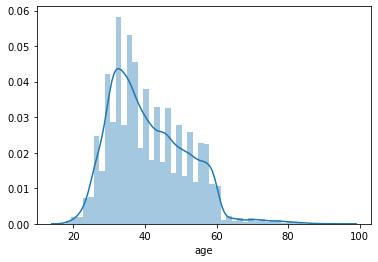

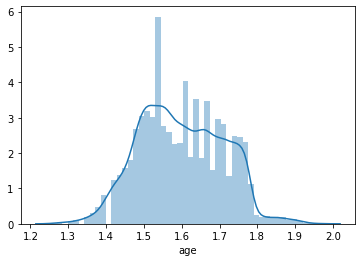

In [55]:
# No need to tranform as distributions appear similar
sns.distplot(bank_df['age'])
plt.show()

sns.distplot(np.log10(bank_df['age']))
plt.show()

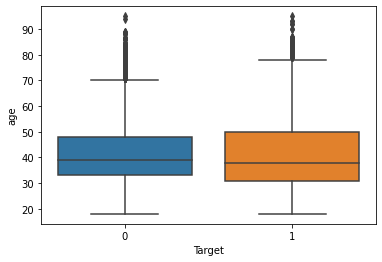

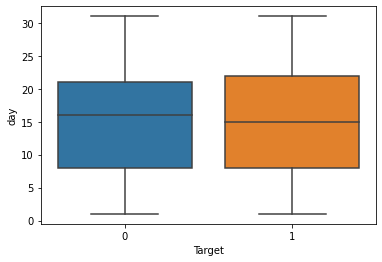

In [58]:
for i in ['age','day']:
    sns.boxplot(x='Target',y=i,data=bank_df)
    plt.show()
# Day might have some linear relationship - earlier in the month you call, the better.     

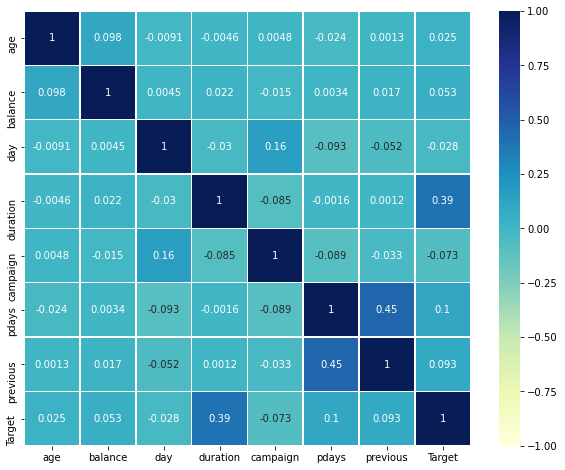

In [238]:
# No correlations found between continous variables
plt.figure(figsize=(10,8))
sns.heatmap(bank_df.corr(),annot=True,linewidths=.5,center=0,cbar=True,cmap="YlGnBu",vmin=-1,vmax=+1)
plt.show()

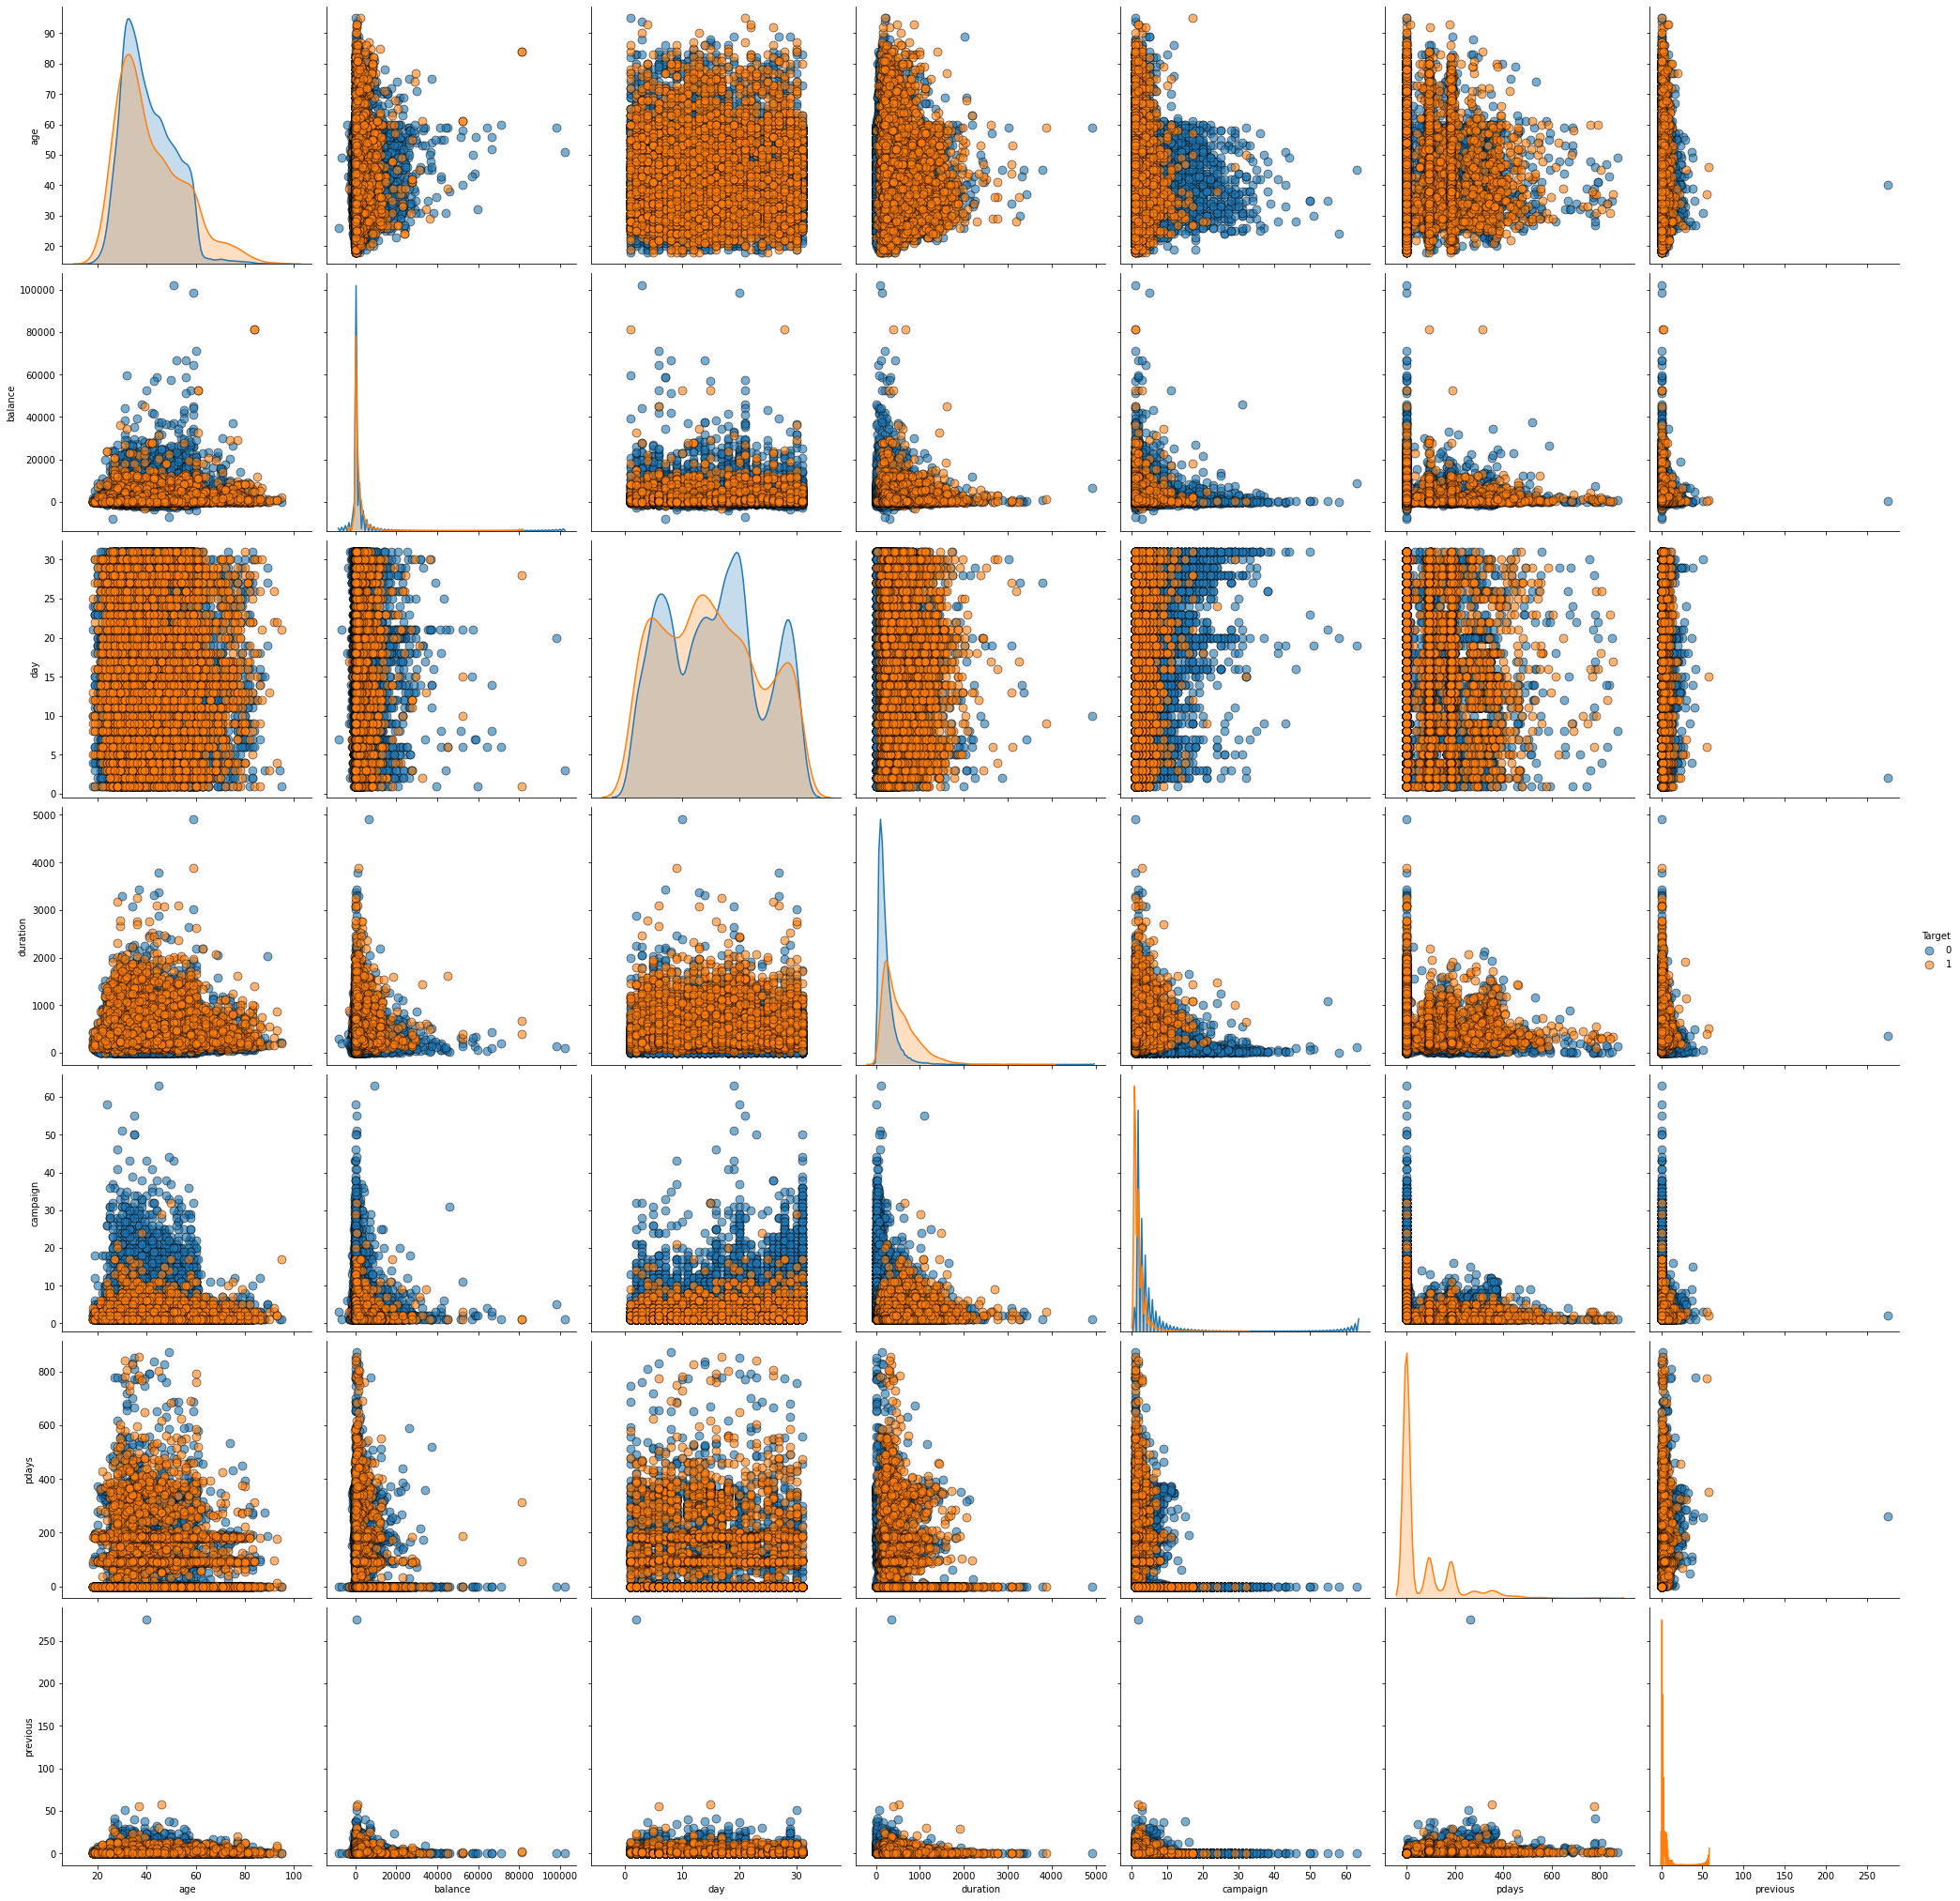

In [239]:
# Use pair plots to find relationships
sns.pairplot(bank_df,hue='Target',diag_kind ='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)   

In [37]:
# Issue with the data - Target is imbalanced
bank_df['Target'].value_counts(normalize=True).sort_index() 

0    0.883015
1    0.116985
Name: Target, dtype: float64

In [269]:
## Scale age & balance for Logistic Regression
bank_df['age_Scale'] = MinMaxScaler().fit_transform(bank_df[['age']])
bank_df['balance_Scale'] = MinMaxScaler().fit_transform(bank_df[['balance']])

In [241]:
## Frequency Encoding
df_temp = pd.DataFrame(bank_df.groupby('job').size()/len(bank_df))
df_temp

0
job                    
admin.         0.114375
blue-collar    0.215257
entrepreneur   0.032890
housemaid      0.027427
management     0.209197
retired        0.050076
self-employed  0.034925
services       0.091880
student        0.020747
technician     0.168034
unemployed     0.028820
unknown        0.006370

In [242]:
# Frequency encoding for Categorical variables
temp = bank_df['job'].apply(lambda x: df_temp.loc[x])
bank_df['job_freq'] = temp

In [243]:
bank_df['job_freq'].value_counts()

0.215257    9732
0.209197    9458
0.168034    7597
0.114375    5171
0.091880    4154
0.050076    2264
0.034925    1579
0.032890    1487
0.028820    1303
0.027427    1240
0.020747     938
0.006370     288
Name: job_freq, dtype: int64

In [244]:
bank_df.describe(include='all').T

count unique          top   freq       mean        std  \
age              45211    NaN          NaN    NaN    40.9362    10.6188   
job              45211     12  blue-collar   9732        NaN        NaN   
marital          45211      3      married  27214        NaN        NaN   
education        45211      4    secondary  23202        NaN        NaN   
default          45211      2           no  44396        NaN        NaN   
balance          45211    NaN          NaN    NaN    1362.27    3044.77   
housing          45211      2          yes  25130        NaN        NaN   
loan             45211      2           no  37967        NaN        NaN   
contact          45211      3     cellular  29285        NaN        NaN   
day              45211    NaN          NaN    NaN    15.8064    8.32248   
month            45211     12          may  13766        NaN        NaN   
duration         45211    NaN          NaN    NaN    258.163    257.528   
campaign         45211    NaN          NaN    NaN    2.76384    3.09802   
pdays            45211    NaN          NaN    NaN    40.1978    100.129   
previous         45211    NaN          NaN    NaN   0.580323    2.30344   
poutcome         45211      4      unknown  36959        NaN        NaN   
Target           45211    NaN          NaN    NaN   0.116985   0.321406   
campaign_Bucket  45211      3       2 to 3  18026        NaN        NaN   
previous_Bucket  45211      3            0  36954        NaN        NaN   
pdays_Bucket     45211      5           -1  36954        NaN        NaN   
balance_Bucket   45211      4          Low  12348        NaN        NaN   
age_Scale        45211    NaN          NaN    NaN   0.297873   0.137906   
balance_Scale    45211    NaN          NaN    NaN  0.0851712   0.027643   
job_freq         45211    NaN          NaN    NaN   0.146721  0.0698295   

                        min        25%        50%       75%       max  
age                      18         33         39        48        95  
job                     NaN        NaN        NaN       NaN       NaN  
marital                 NaN        NaN        NaN       NaN       NaN  
education               NaN        NaN        NaN       NaN       NaN  
default                 NaN        NaN        NaN       NaN       NaN  
balance               -8019         72        448      1428    102127  
housing                 NaN        NaN        NaN       NaN       NaN  
loan                    NaN        NaN        NaN       NaN       NaN  
contact                 NaN        NaN        NaN       NaN       NaN  
day                       1          8         16        21        31  
month                   NaN        NaN        NaN       NaN       NaN  
duration                  0        103        180       319      4918  
campaign                  1          1          2         3        63  
pdays                    -1         -1         -1        -1       871  
previous                  0          0          0         0       275  
poutcome                NaN        NaN        NaN       NaN       NaN  
Target                    0          0          0         0         1  
campaign_Bucket         NaN        NaN        NaN       NaN       NaN  
previous_Bucket         NaN        NaN        NaN       NaN       NaN  
pdays_Bucket            NaN        NaN        NaN       NaN       NaN  
balance_Bucket          NaN        NaN        NaN       NaN       NaN  
age_Scale                 0   0.194805   0.272727   0.38961         1  
balance_Scale             0   0.073457  0.0768707  0.085768         1  
job_freq         0.00637013  0.0918803   0.168034  0.209197  0.215257

In [ ]:
## Final Variables to be used for modelling
#'age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
#       'contact', 'day', 'month', 'Target', 'campaign_Bucket',
#       'previous_Bucket', 'pdays_Bucket', 'balance_Bucket', 'age_Scale',
#       'balance_Scale','job_freq'


In [245]:
# Keep a copy of dataset in case required again
bank_df_copy = bank_df.copy()

In [262]:
# Modelling
model= []
trainacc = []
testacc = []
recall = []
precision = []
roc = []
# Blanks list to store model name, training score, testing score, recall, precision and roc

#### Logistic Regression

In [274]:
bank_df_logmodel = pd.get_dummies(bank_df, drop_first=True)

In [275]:
bank_df_logmodel.columns

Index(['age', 'balance', 'day', 'Target', 'age_Scale', 'balance_Scale',
       'job_freq', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'campaign_Bucket_2 to 3', 'campaign_Bucket_>3', 'previous_Bucket_1',
       'previous_Bucket_>1', 'pdays_Bucket_0-120', 'pdays_Bucket_120-240',
       'pdays_Bucket_240-540', 'pdays_Bucket_>540', 'balance_Bucket_Low',
       'balance_Bucket_Medium', 'balance_Bucket_Very Low'],
      dtype='object')

In [276]:
bank_df_logmodel.drop(['age', 'balance', 'age_Scale','day','job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'balance_Bucket_Low', 'balance_Bucket_Medium',
       'balance_Bucket_Very Low', 'pdays_Bucket_0-120', 'pdays_Bucket_120-240',
       'pdays_Bucket_240-540', 'pdays_Bucket_>540'],axis=1,inplace=True)

In [277]:
# Check for Multicolliniarity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(bank_df_logmodel.drop(['Target',],axis=1).values, i) for i in range(bank_df_logmodel.drop(['Target'],axis=1).shape[1])]
vif['variable'] = bank_df_logmodel.drop(['Target'],axis=1).columns
vif.sort_values(by='VIF',ascending=False)

VIF                variable
0   8.606740           balance_Scale
2   5.368560         marital_married
1   5.352922                job_freq
18  5.305657               month_may
4   3.975150     education_secondary
10  3.305397         contact_unknown
3   3.080704          marital_single
16  3.062959               month_jun
7   3.016268             housing_yes
5   2.928378      education_tertiary
11  2.702163               month_aug
15  2.638992               month_jul
22  2.044455  campaign_Bucket_2 to 3
19  1.963869               month_nov
23  1.688110      campaign_Bucket_>3
13  1.584998               month_feb
25  1.349946      previous_Bucket_>1
14  1.299739               month_jan
8   1.244900                loan_yes
6   1.240953       education_unknown
20  1.186951               month_oct
24  1.182774       previous_Bucket_1
21  1.147771               month_sep
9   1.137620       contact_telephone
17  1.115531               month_mar
12  1.057174               month_dec

In [278]:
# Split dataset into training and test dataset
X_train, X_test, y_train, y_test =train_test_split(bank_df_logmodel.drop(['Target'],axis=1), bank_df_logmodel['Target'], test_size=.3,
                                                   random_state=22,shuffle=True)
X_train.shape,X_test.shape

((31647, 26), (13564, 26))

In [279]:
y_train.value_counts(normalize=True)

0    0.883148
1    0.116852
Name: Target, dtype: float64

In [280]:
y_test.value_counts(normalize=True)

0    0.882704
1    0.117296
Name: Target, dtype: float64

In [281]:
# Logistic Regression
logreg = LogisticRegression(random_state=22)
logreg.fit(X_train, y_train)                               # fit the model on train data

LogisticRegression(random_state=22)

In [282]:
y_predict = logreg.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [283]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


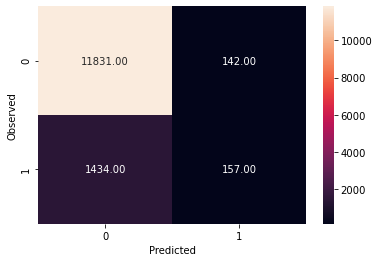

None



In [284]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()

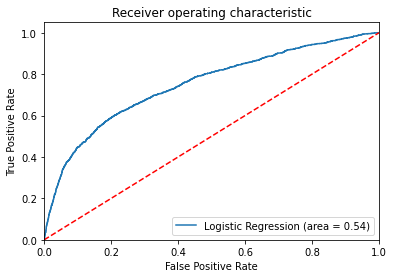

In [285]:
#AUC ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [286]:
import statsmodels.api as sm
logit = sm.Logit(y_train,sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.312361
         Iterations 7


In [287]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31620
Method:                           MLE   Df Model:                           26
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:                  0.1338
Time:                        00:03:33   Log-Likelihood:                -9885.3
converged:                       True   LL-Null:                       -11412.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.1231      0.116     -9.649      0.000      -1.351      -0.895
balance_Scale              2.1422      0.583      3.675      0.000       1.000       3.285
job_

In [289]:
# Printing all metrics
print("Training Accuracy",logreg.score(X_train, y_train))
print("Testing Accuracy",logreg.score(X_test, y_test))
print("Recall",recall_score(y_test,logreg.predict(X_test)))
print("Precision",precision_score(y_test,logreg.predict(X_test)))
print("ROC AUC Curve",roc_auc_score(y_test,logreg.predict(X_test)))

Training Accuracy 0.8851075931367902
Testing Accuracy 0.8838100855204954
Recall 0.09868007542426147
Precision 0.5250836120401338
ROC AUC Curve 0.5434100285247926


In [290]:
# Add all metrics to combined arrays
model.append('Logistic Regression')
trainacc.append(logreg.score(X_train, y_train))
testacc.append(logreg.score(X_test, y_test))
recall.append(recall_score(y_test,logreg.predict(X_test)))
precision.append(precision_score(y_test,logreg.predict(X_test)))
roc.append(roc_auc_score(y_test,logreg.predict(X_test)))
print(model)

['Logistic Regression']


In [291]:
model

['Logistic Regression']

In [ ]:
#Decision Trees

In [292]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'Target', 'campaign_Bucket',
       'previous_Bucket', 'pdays_Bucket', 'balance_Bucket', 'age_Scale',
       'balance_Scale', 'job_freq'],
      dtype='object')

In [293]:
bank_df_model = bank_df[['age', 'job_freq', 'marital', 'education', 'housing', 'loan',
       'contact', 'day', 'month', 'Target', 'campaign_Bucket',
       'previous_Bucket', 'pdays_Bucket', 'balance_Bucket']]

In [294]:
bank_df_model = pd.get_dummies(bank_df_model, drop_first=True)

In [295]:
X_train, X_test, y_train, y_test =train_test_split(bank_df_model.drop(['Target'],axis=1), bank_df_model['Target'], test_size=.3,
                                                   random_state=22,shuffle=True)
X_train.shape,X_test.shape

((31647, 34), (13564, 34))

### Decision Tree

In [296]:
dt_model = DecisionTreeClassifier(criterion = "gini", random_state = 22)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=22)

In [297]:
y_predict = dt_model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

Confusion Matrix


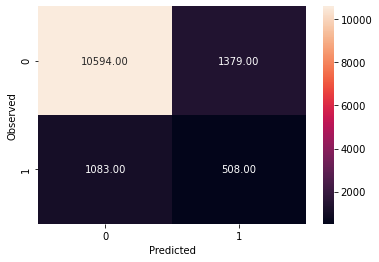

None



In [298]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()

In [299]:
# Printing all metrics
print("Training Accuracy",dt_model.score(X_train, y_train))
print("Testing Accuracy",dt_model.score(X_test, y_test))
print("Recall",recall_score(y_test,dt_model.predict(X_test)))
print("Precision",precision_score(y_test,dt_model.predict(X_test)))
print("ROC AUC Curve",roc_auc_score(y_test,dt_model.predict(X_test)))

Training Accuracy 0.9988308528454514
Testing Accuracy 0.8184901209082867
Recall 0.3192960402262728
Precision 0.2692103868574457
ROC AUC Curve 0.6020601139910284


In [300]:
xvar = bank_df_model.drop(['Target'], axis=1)
feature_cols = xvar.columns
feature_cols
# Feature Importance
feat_importance = dt_model.feature_importances_
feat_imp_dict = dict(zip(feature_cols, dt_model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
age                      0.233342
day                      0.182148
job_freq                 0.098994
campaign_Bucket_2 to 3   0.038316
pdays_Bucket_0-120       0.028850
balance_Bucket_Low       0.024793
education_secondary      0.024589
balance_Bucket_Medium    0.024141
loan_yes                 0.023732
balance_Bucket_Very Low  0.020719
education_tertiary       0.020451
campaign_Bucket_>3       0.019208
housing_yes              0.018541
month_jul                0.018200
month_mar                0.017542
month_aug                0.014659
month_jun                0.014337
month_sep                0.014217
marital_single           0.013727
contact_telephone        0.013110
month_oct                0.012925
month_feb                0.012849
contact_unknown          0.012721
month_nov                0.012698
previous_Bucket_1        0.011322
marital_married          0.011079
previous_Bucket_>1       0.010997
month_may                0.010990
month_jan                0.009309
education_unknown        0.009084
pdays_Bucket_240-540     0.008153
pdays_Bucket_120-240     0.007228
month_dec                0.004484
pdays_Bucket_>540        0.002546

In [303]:
model

['Logistic Regression', 'Decision Tree']

In [302]:
# Add all metrics to combined arrays
model.append('Decision Tree')
trainacc.append(dt_model.score(X_train, y_train))
testacc.append(dt_model.score(X_test, y_test))
recall.append(recall_score(y_test,dt_model.predict(X_test)))
precision.append(precision_score(y_test,dt_model.predict(X_test)))
roc.append(roc_auc_score(y_test,dt_model.predict(X_test)))
print(model)

['Logistic Regression', 'Decision Tree']


### Pruned Decision Tree

In [304]:
# Decision Tree Pruned
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 22,
                               max_depth=3, min_samples_leaf=25)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=25, random_state=22)

In [305]:
y_predict = clf_pruned.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

Confusion Matrix


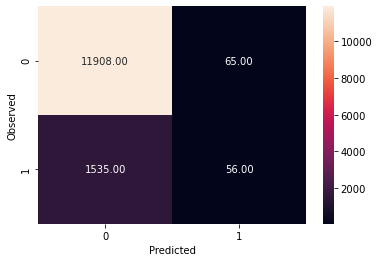

None



In [306]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()

In [307]:
# Printing all metrics
print("Training Accuracy",clf_pruned.score(X_train, y_train))
print("Testing Accuracy",clf_pruned.score(X_test, y_test))
print("Recall",recall_score(y_test,clf_pruned.predict(X_test)))
print("Precision",precision_score(y_test,clf_pruned.predict(X_test)))
print("ROC AUC Curve",roc_auc_score(y_test,clf_pruned.predict(X_test)))

Training Accuracy 0.8838120516952633
Testing Accuracy 0.8820406959598939
Recall 0.03519798868636078
Precision 0.4628099173553719
ROC AUC Curve 0.5148845535179903


In [310]:
model

['Logistic Regression', 'Decision Tree', 'Pruned Decision Tree']

In [309]:
# Add all metrics to combined arrays
model.append('Pruned Decision Tree')
trainacc.append(clf_pruned.score(X_train, y_train))
testacc.append(clf_pruned.score(X_test, y_test))
recall.append(recall_score(y_test,clf_pruned.predict(X_test)))
precision.append(precision_score(y_test,clf_pruned.predict(X_test)))
roc.append(roc_auc_score(y_test,clf_pruned.predict(X_test)))
print(model)

['Logistic Regression', 'Decision Tree', 'Pruned Decision Tree']


### Random Forest

In [311]:
# Initiate Random Forest Model
rfcl = RandomForestClassifier(n_estimators = 50,oob_score=True,random_state=22)
rfcl = rfcl.fit(X_train, y_train)

In [312]:
# Make predictions and calculate accuracy
y_predict = rfcl.predict(X_test)

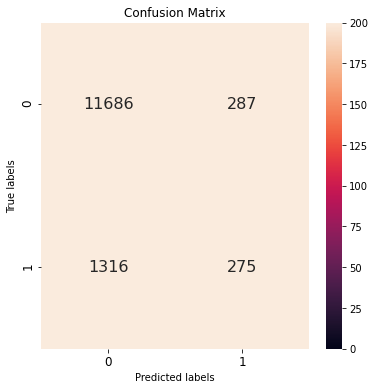

In [313]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1'],fontsize=12);

In [314]:
# Printing all metrics
print("Training Accuracy",rfcl.score(X_train, y_train))
print("Testing Accuracy",rfcl.score(X_test, y_test))
print("Recall",recall_score(y_test,rfcl.predict(X_test)))
print("Precision",precision_score(y_test,rfcl.predict(X_test)))
print("ROC AUC Curve",roc_auc_score(y_test,rfcl.predict(X_test)))

Training Accuracy 0.9980092899800929
Testing Accuracy 0.8818195222648186
Recall 0.17284726587052168
Precision 0.4893238434163701
ROC AUC Curve 0.5744383326763448


In [315]:
model

['Logistic Regression', 'Decision Tree', 'Pruned Decision Tree']

In [316]:
# Add all metrics to combined arrays
model.append('Random Forest')
trainacc.append(rfcl.score(X_train, y_train))
testacc.append(rfcl.score(X_test, y_test))
recall.append(recall_score(y_test,rfcl.predict(X_test)))
precision.append(precision_score(y_test,rfcl.predict(X_test)))
roc.append(roc_auc_score(y_test,rfcl.predict(X_test)))
print(model)

['Logistic Regression', 'Decision Tree', 'Pruned Decision Tree', 'Random Forest']


### Bagging Classifier

In [317]:
## Bagging Classifier
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)


In [318]:
# Make predictions and calculate accuracy
pred_BG = bgcl.predict(X_test)

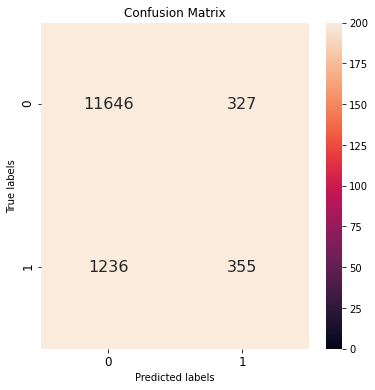

In [319]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_BG),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1'],fontsize=12);

In [320]:
# Printing all metrics
print("Training Accuracy",bgcl.score(X_train, y_train))
print("Testing Accuracy",bgcl.score(X_test, y_test))
print("Recall",recall_score(y_test,bgcl.predict(X_test)))
print("Precision",precision_score(y_test,bgcl.predict(X_test)))
print("ROC AUC Curve",roc_auc_score(y_test,bgcl.predict(X_test)))

Training Accuracy 0.9826523841122381
Testing Accuracy 0.8847685048658213
Recall 0.2231301068510371
Precision 0.5205278592375366
ROC AUC Curve 0.5979093280434089


In [321]:
# Add all metrics to combined arrays
model.append('Bagging')
trainacc.append(bgcl.score(X_train, y_train))
testacc.append(bgcl.score(X_test, y_test))
recall.append(recall_score(y_test,bgcl.predict(X_test)))
precision.append(precision_score(y_test,bgcl.predict(X_test)))
roc.append(roc_auc_score(y_test,bgcl.predict(X_test)))
print(model)

['Logistic Regression', 'Decision Tree', 'Pruned Decision Tree', 'Random Forest', 'Bagging']


### Adaboost Classifier

In [322]:
# Initiate adaboost classifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [323]:
# Make predictions and calculate accuracy
pred_AB =abcl.predict(X_test)

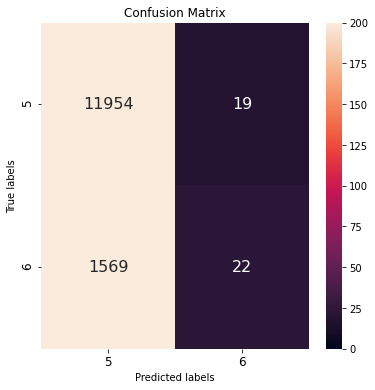

In [324]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_AB),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['5','6','7'],fontsize=12); 
ax.yaxis.set_ticklabels(['5','6','7'],fontsize=12);

In [325]:
# Printing all metrics
print("Training Accuracy",abcl.score(X_train, y_train))
print("Testing Accuracy",abcl.score(X_test, y_test))
print("Recall",recall_score(y_test,abcl.predict(X_test)))
print("Precision",precision_score(y_test,abcl.predict(X_test)))
print("ROC AUC Curve",roc_auc_score(y_test,abcl.predict(X_test)))

Training Accuracy 0.8832116788321168
Testing Accuracy 0.8829253907401946
Recall 0.013827781269641735
Precision 0.5365853658536586
ROC AUC Curve 0.5061204387013037


In [326]:
# Add all metrics to combined arrays
model.append('Ada Boost Classifier')
trainacc.append(abcl.score(X_train, y_train))
testacc.append(abcl.score(X_test, y_test))
recall.append(recall_score(y_test,abcl.predict(X_test)))
precision.append(precision_score(y_test,abcl.predict(X_test)))
roc.append(roc_auc_score(y_test,abcl.predict(X_test)))
print(model)

['Logistic Regression', 'Decision Tree', 'Pruned Decision Tree', 'Random Forest', 'Bagging', 'Ada Boost Classifier']


### Gradient Boosting Classifier

In [327]:
# Initiate Gradiant Boosting Classifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [328]:
# Make predictions and calculate accuracy on test data set
pred_GB = gbcl.predict(X_test)

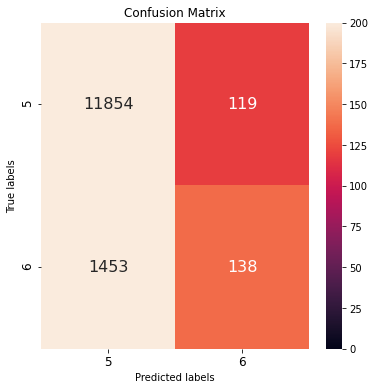

In [329]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_GB),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['5','6','7'],fontsize=12); 
ax.yaxis.set_ticklabels(['5','6','7'],fontsize=12);

In [330]:
# Printing all metrics
print("Training Accuracy",gbcl.score(X_train, y_train))
print("Testing Accuracy",gbcl.score(X_test, y_test))
print("Recall",recall_score(y_test,gbcl.predict(X_test)))
print("Precision",precision_score(y_test,gbcl.predict(X_test)))
print("ROC AUC Curve",roc_auc_score(y_test,gbcl.predict(X_test)))

Training Accuracy 0.8879514645938004
Testing Accuracy 0.8841049837805957
Recall 0.08673790069138906
Precision 0.5369649805447471
ROC AUC Curve 0.5383994356041929


In [331]:
# Add all metrics to combined arrays
model.append('Gradiant Boosting')
trainacc.append(gbcl.score(X_train, y_train))
testacc.append(gbcl.score(X_test, y_test))
recall.append(recall_score(y_test,gbcl.predict(X_test)))
precision.append(precision_score(y_test,gbcl.predict(X_test)))
roc.append(roc_auc_score(y_test,gbcl.predict(X_test)))
print(model)

['Logistic Regression', 'Decision Tree', 'Pruned Decision Tree', 'Random Forest', 'Bagging', 'Ada Boost Classifier', 'Gradiant Boosting']


### Imbalanced Bagging

In [332]:
bgcl_bal = BalancedBaggingClassifier(random_state=22)
bgcl_bal.fit(X_train, y_train)                                        # fit the model on train data

BalancedBaggingClassifier(random_state=22)

In [333]:
y_predict = bgcl_bal.predict(X_test)
y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int8)

Confusion Matrix


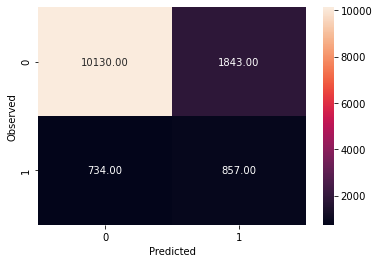

None



In [334]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()

In [335]:
# Printing all metrics
print("Training Accuracy",bgcl_bal.score(X_train, y_train))
print("Testing Accuracy",bgcl_bal.score(X_test, y_test))
print("Recall",recall_score(y_test,bgcl_bal.predict(X_test)))
print("Precision",precision_score(y_test,bgcl_bal.predict(X_test)))
print("ROC AUC Curve",roc_auc_score(y_test,bgcl_bal.predict(X_test)))

Training Accuracy 0.8973362404019338
Testing Accuracy 0.8100117959304041
Recall 0.5386549340037712
Precision 0.3174074074074074
ROC AUC Curve 0.6923626294507288


In [336]:
# Add all metrics to combined arrays
model.append('Imbalanced Bagging')
trainacc.append(bgcl_bal.score(X_train, y_train))
testacc.append(bgcl_bal.score(X_test, y_test))
recall.append(recall_score(y_test,bgcl_bal.predict(X_test)))
precision.append(precision_score(y_test,bgcl_bal.predict(X_test)))
roc.append(roc_auc_score(y_test,bgcl_bal.predict(X_test)))
print(model)

['Logistic Regression', 'Decision Tree', 'Pruned Decision Tree', 'Random Forest', 'Bagging', 'Ada Boost Classifier', 'Gradiant Boosting', 'Imbalanced Bagging']


### Imbalanced Random Forest

In [337]:
rfcl_bal = BalancedRandomForestClassifier(random_state=22)
rfcl_bal.fit(X_train, y_train)                               # fit the model on train data

BalancedRandomForestClassifier(random_state=22)

In [338]:
y_predict = rfcl_bal.predict(X_test)
y_predict

array([1, 0, 1, ..., 1, 0, 0], dtype=int8)

Confusion Matrix


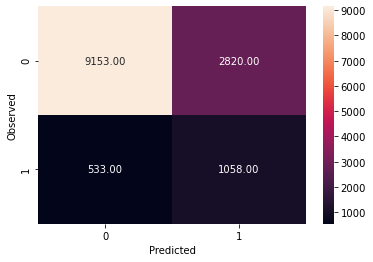

None



In [339]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()

In [340]:
# Printing all metrics
print("Training Accuracy",rfcl_bal.score(X_train, y_train))
print("Testing Accuracy",rfcl_bal.score(X_test, y_test))
print("Recall",recall_score(y_test,rfcl_bal.predict(X_test)))
print("Precision",precision_score(y_test,rfcl_bal.predict(X_test)))
print("ROC AUC Curve",roc_auc_score(y_test,rfcl_bal.predict(X_test)))

Training Accuracy 0.8385628969570575
Testing Accuracy 0.7528015334709525
Recall 0.6649905719673161
Precision 0.2728210417741104
ROC AUC Curve 0.7147303147984915


In [341]:
# Add all metrics to combined arrays
model.append('Imbalanced Random Forest')
trainacc.append(rfcl_bal.score(X_train, y_train))
testacc.append(rfcl_bal.score(X_test, y_test))
recall.append(recall_score(y_test,rfcl_bal.predict(X_test)))
precision.append(precision_score(y_test,rfcl_bal.predict(X_test)))
roc.append(roc_auc_score(y_test,rfcl_bal.predict(X_test)))
print(model)

['Logistic Regression', 'Decision Tree', 'Pruned Decision Tree', 'Random Forest', 'Bagging', 'Ada Boost Classifier', 'Gradiant Boosting', 'Imbalanced Bagging', 'Imbalanced Random Forest']


### Compare Results across models

In [342]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = trainacc
results['Testing Score'] = testacc
results['Recall'] = recall
results['Precision'] = precision
results['ROC AUC Score'] = roc
results = results.set_index('Model')
results

Training Score  Testing Score    Recall  Precision  \
Model                                                                          
Logistic Regression             0.885108       0.883810  0.098680   0.525084   
Decision Tree                   0.998831       0.818490  0.319296   0.269210   
Pruned Decision Tree            0.883812       0.882041  0.035198   0.462810   
Random Forest                   0.998009       0.881820  0.172847   0.489324   
Bagging                         0.982652       0.884769  0.223130   0.520528   
Ada Boost Classifier            0.883212       0.882925  0.013828   0.536585   
Gradiant Boosting               0.887951       0.884105  0.086738   0.536965   
Imbalanced Bagging              0.897336       0.810012  0.538655   0.317407   
Imbalanced Random Forest        0.838563       0.752802  0.664991   0.272821   

                          ROC AUC Score  
Model                                    
Logistic Regression            0.543410  
Decision Tree                  0.602060  
Pruned Decision Tree           0.514885  
Random Forest                  0.574438  
Bagging                        0.597909  
Ada Boost Classifier           0.506120  
Gradiant Boosting              0.538399  
Imbalanced Bagging             0.692363  
Imbalanced Random Forest       0.714730

In [ ]:
# Based on your business decision, define your optimizing vs satisfying Criteria
# In this case, we define Recall to be our optimizing criteria with our Satisfying criteria as Acc - 0.8 & Precision - 0.3
# So, we can choose the model as Imbalanced Bagging and proceed with grid search tuning to figure out the best model.

In [343]:
# Model Interpretation
import lime
import lime.lime_tabular

In [347]:
predict_fn_rf = lambda x: bgcl_bal.predict_proba(x).astype(float)
X = X_train.values

In [348]:
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = bank_df_model.drop('Target',axis=1).columns,class_names=['No','Yes'],kernel_width=5)

In [349]:
X_test.iloc[105]

age                        45.000000
job_freq                    0.114375
day                         5.000000
marital_married             1.000000
marital_single              0.000000
education_secondary         1.000000
education_tertiary          0.000000
education_unknown           0.000000
housing_yes                 0.000000
loan_yes                    0.000000
contact_telephone           0.000000
contact_unknown             0.000000
month_aug                   1.000000
month_dec                   0.000000
month_feb                   0.000000
month_jan                   0.000000
month_jul                   0.000000
month_jun                   0.000000
month_mar                   0.000000
month_may                   0.000000
month_nov                   0.000000
month_oct                   0.000000
month_sep                   0.000000
campaign_Bucket_2 to 3      0.000000
campaign_Bucket_>3          0.000000
previous_Bucket_1           0.000000
previous_Bucket_>1          0.000000
p

In [350]:
y_test.values[105]

1

In [351]:
# Explain which features are leading to Low (5) class prediction
choosen_instance = X_test.values[105]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10,labels=[0,1])
exp.show_in_notebook(show_all=True)